In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS_Weather_Lock\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')
y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 11)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), strides=1, kernel_regularizer=l1(0.01)))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1))

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             768       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4069 (15.89 KB)
Trainable params: 4069 (15.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 1ms/step - loss: 119424.9141 - mse: 119412.9922 - rmse: 338.1909 - mae: 225.2430 - mape: 4033358080.0000 - val_loss: 100317.6641 - val_mse: 100302.9375 - val_rmse: 310.4986 - val_mae: 208.4338 - val_mape: 3663459072.0000
Epoch 2/100
1083/1083 [==============================] - 1s 1ms/step - loss: 92429.8281 - mse: 92412.6172 - rmse: 298.0745 - mae: 192.8393 - mape: 3203372800.0000 - val_loss: 86234.2109 - val_mse: 86214.9531 - val_rmse: 286.5864 - val_mae: 188.7012 - val_mape: 3402210048.0000
Epoch 3/100
1083/1083 [==============================] - 1s 1ms/step - loss: 82665.0781 - mse: 82644.8672 - rmse: 280.8755 - mae: 178.6993 - mape: 2964433408.0000 - val_loss: 78989.1953 - val_mse: 78967.9844 - val_rmse: 273.5524 - val_mae: 175.4850 - val_mape: 2826513664.0000
Epoch 4/100
1083/1083 [==============================] - 1s 1ms/step - loss: 77813.8984 - mse: 77791.7188 - rmse: 272.3207 - mae: 172.6745 - mape: 2795259904.0000 - 

1083/1083 [==============================] - 2s 1ms/step - loss: 45380.9609 - mse: 45335.1523 - rmse: 205.8742 - mae: 131.0941 - mape: 2511887616.0000 - val_loss: 44886.3750 - val_mse: 44840.3945 - val_rmse: 203.9056 - val_mae: 128.9254 - val_mape: 2569122304.0000
Epoch 31/100
1083/1083 [==============================] - 2s 1ms/step - loss: 45230.8945 - mse: 45184.6211 - rmse: 205.9915 - mae: 130.0705 - mape: 2545566464.0000 - val_loss: 45634.3398 - val_mse: 45587.8320 - val_rmse: 206.1705 - val_mae: 133.7725 - val_mape: 2851234560.0000
Epoch 32/100
1083/1083 [==============================] - 2s 1ms/step - loss: 44728.0078 - mse: 44681.2773 - rmse: 204.8000 - mae: 129.9772 - mape: 2504788736.0000 - val_loss: 44488.9531 - val_mse: 44442.0312 - val_rmse: 203.1073 - val_mae: 129.0060 - val_mape: 2463161600.0000
Epoch 33/100
1083/1083 [==============================] - 2s 1ms/step - loss: 44028.7148 - mse: 43981.5547 - rmse: 203.1479 - mae: 128.9841 - mape: 2482304512.0000 - val_loss: 469

In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 41301.4609 - mse: 41250.5000 - rmse: 195.9591 - mae: 123.9336 - mape: 2444879104.0000
Test Loss: [41301.4609375, 41250.5, 195.95909118652344, 123.93363952636719, 2444879104.0]


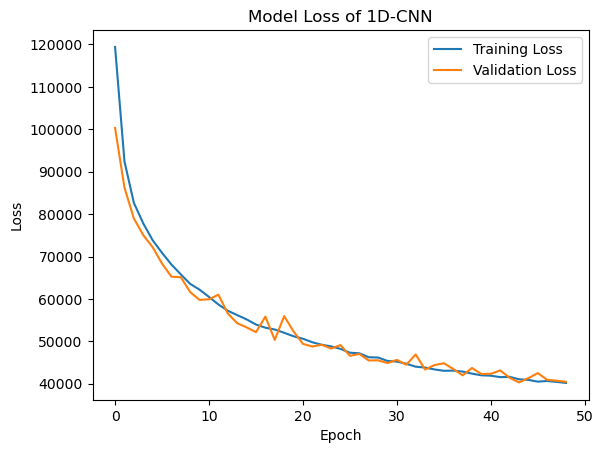

In [13]:
# History is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of 1D-CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 814us/step


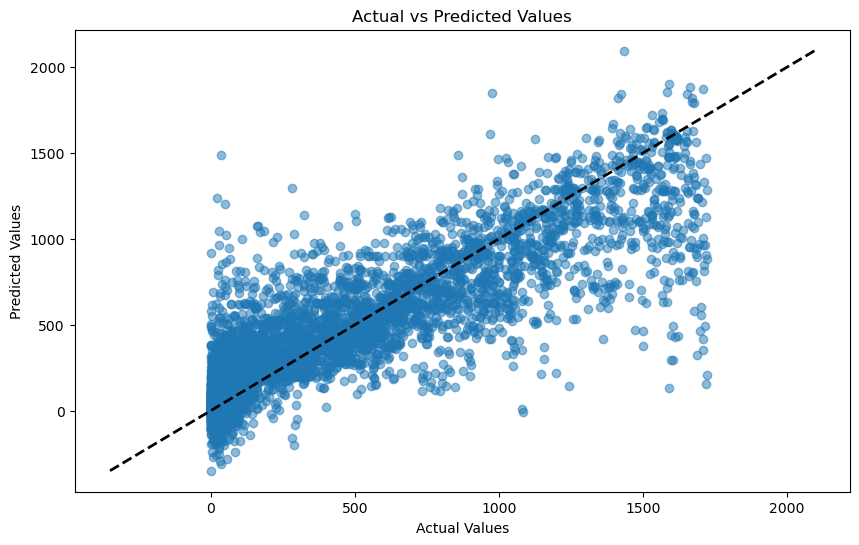

In [15]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

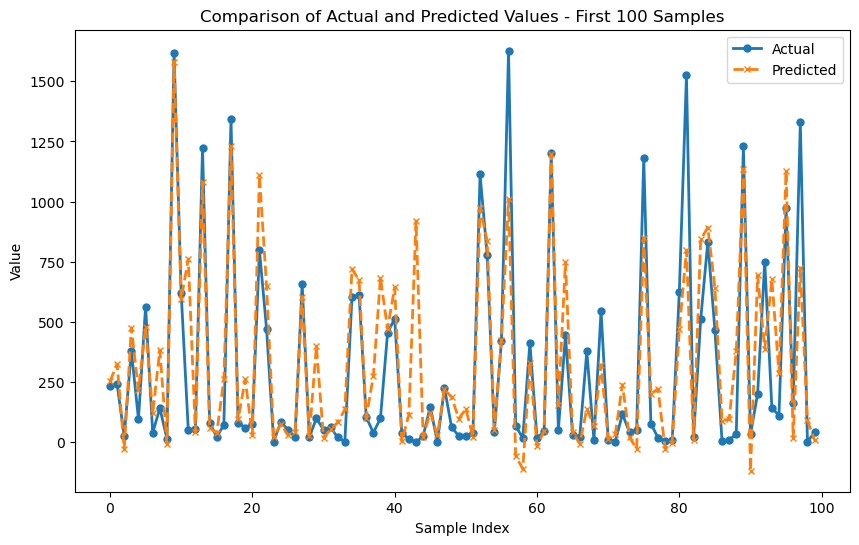

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

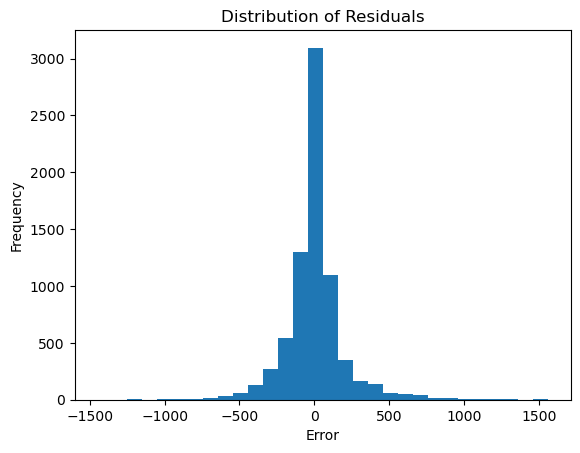

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 41301.4609 - mse: 41250.5000 - rmse: 195.9591 - mae: 123.9336 - mape: 2444879104.0000
Test loss (MSE): 41301.4609375
Mean Squared Error (MSE): 41250.5
Root Mean Squared Error (RMSE): 195.95909118652344
Mean Absolute Error (MAE): 123.93363952636719
Mean Absolute Percentage Error (MAPE): 2444879104.0


### Hyperparameter Tuning 

In [19]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [20]:
sequence_length = 1 
num_features = 11
input_shape = (sequence_length, num_features)

In [21]:
def build_model_cnn(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=512, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu',
        input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
        activation='relu'))
    model.add(Dense(1, activation='linear'))  # Adjust the activation function as per your problem's need

    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',  # Adjust the loss function as per your problem's need
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [22]:
# Set up the tuner for the CNN model
tuner_cnn = kt.RandomSearch(
    build_model_cnn,
    objective='val_mse',  
    max_trials=10,        
    executions_per_trial=3, 
    directory='my_dir_cnn',    
    project_name='1d_cnn'
)

Reloading Tuner from my_dir_cnn\1d_cnn\tuner0.json


In [23]:
tuner_cnn.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
160               |160               |filters
7                 |5                 |kernel_size
64                |352               |dense_units
0.0028067         |0.00031548        |learning_rate



Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\AppData\Local\Temp\ipykernel_11204\1440507588.py", line 3, in build_model_cnn
    model.add(Conv1D(
  File "C:\Users\firoj\anaconda3\Lib\site-packages\tensorflow\python\trackable\base.py", line 204, in _method_wrapper
    result = method(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 354, in compute_output_shape
    raise ValueError(
ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d. Consider increasing the input size. Received input shape [None, 1, 11] which would produce output shape with a zero or negative value in a dimension.


In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Filters: {best_hps.get('filters')}")
print(f"Best Kernel Size: {best_hps.get('kernel_size')}")
print(f"Best Dense Units: {best_hps.get('dense_units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")